<a href="https://colab.research.google.com/github/MehulKorat/Diwali-Sales-Data-Cleaning/blob/main/diwali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
uploaded = files.upload()



Saving Dataset.csv to Dataset (2).csv


In [41]:
df = pd.read_csv('Dataset.csv', encoding='latin1')

In [42]:
df.shape

df.head(10)

df.info()

df.drop(['Status','unnamed1'],axis=1,inplace=True)

pd.isnull(df).sum()

df.dropna(inplace=True)

df['Amount']=df['Amount'].astype('int')

df['Amount'].dtypes

df.columns

df.rename(columns= {'Marital_Status':'Shaadi'})

df.describe()
df[['Age', 'Orders', 'Amount']].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


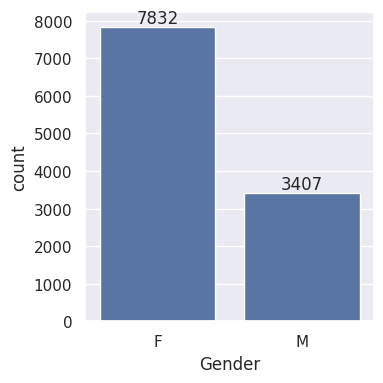

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(rc={'figure.figsize':(4,4)})
ax = sns.countplot(data = df,x = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()


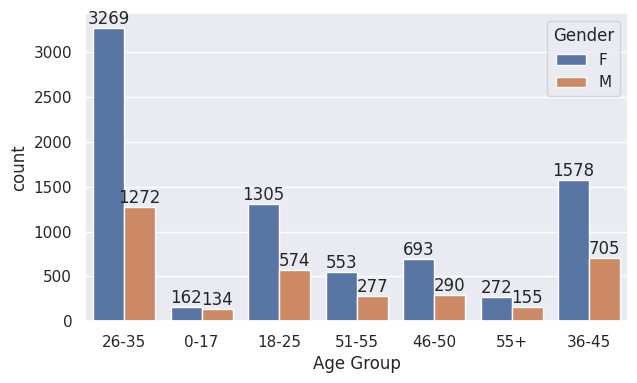

In [30]:
sns.set(rc={'figure.figsize':(7,4)})
ax = sns.countplot(data = df, x = 'Age Group',hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

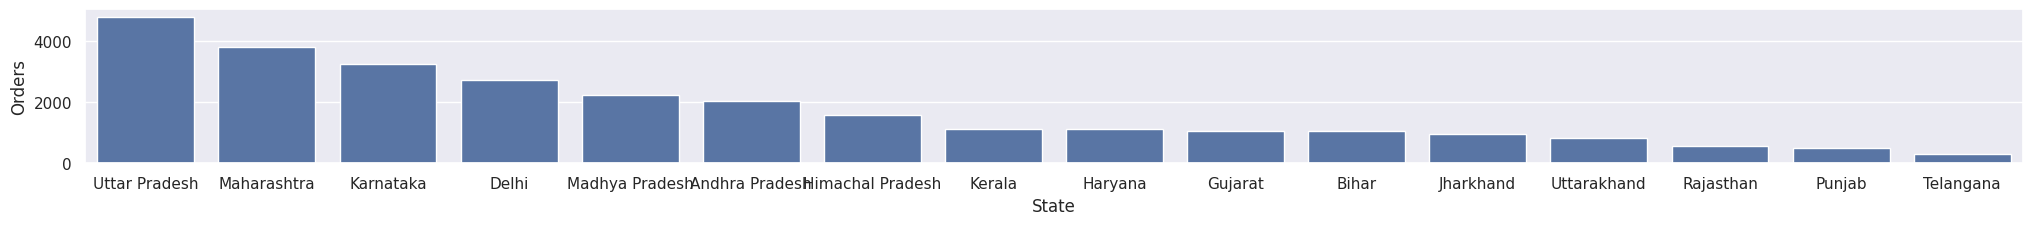

In [31]:
sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set(rc={'figure.figsize':(25,2)})
sns.barplot(data = sales, x = 'State',y= 'Orders')

<Axes: xlabel='Age Group', ylabel='Amount'>

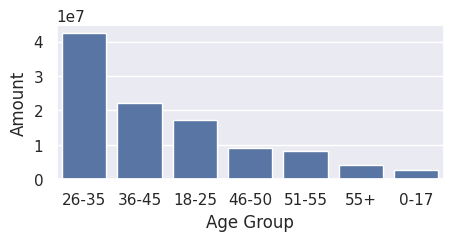

In [32]:
sns.set(rc={'figure.figsize':(5,2)})
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

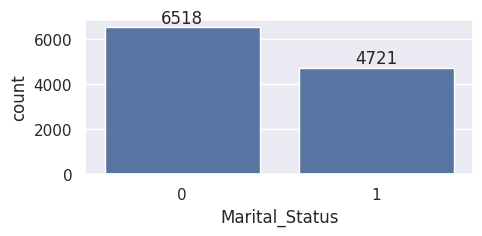

In [33]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

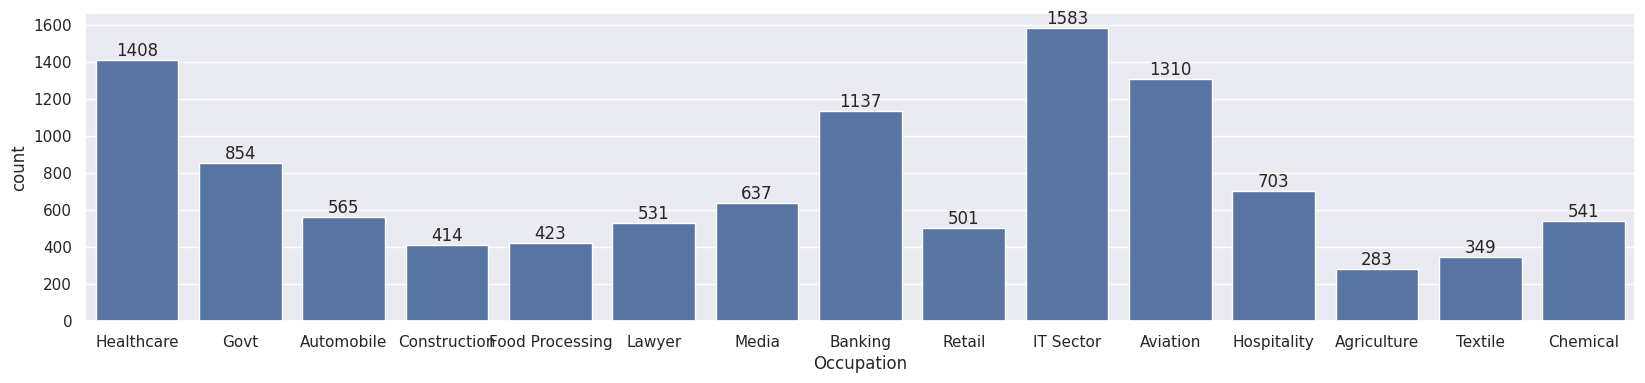

In [34]:
sns.set({'figure.figsize':(20,4)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

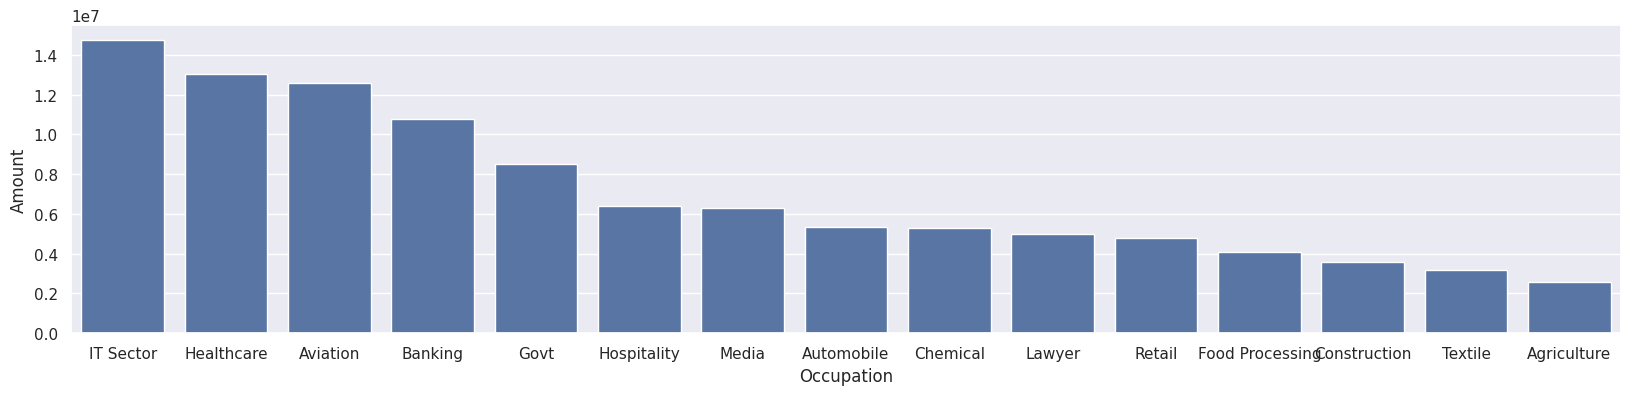

In [35]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')


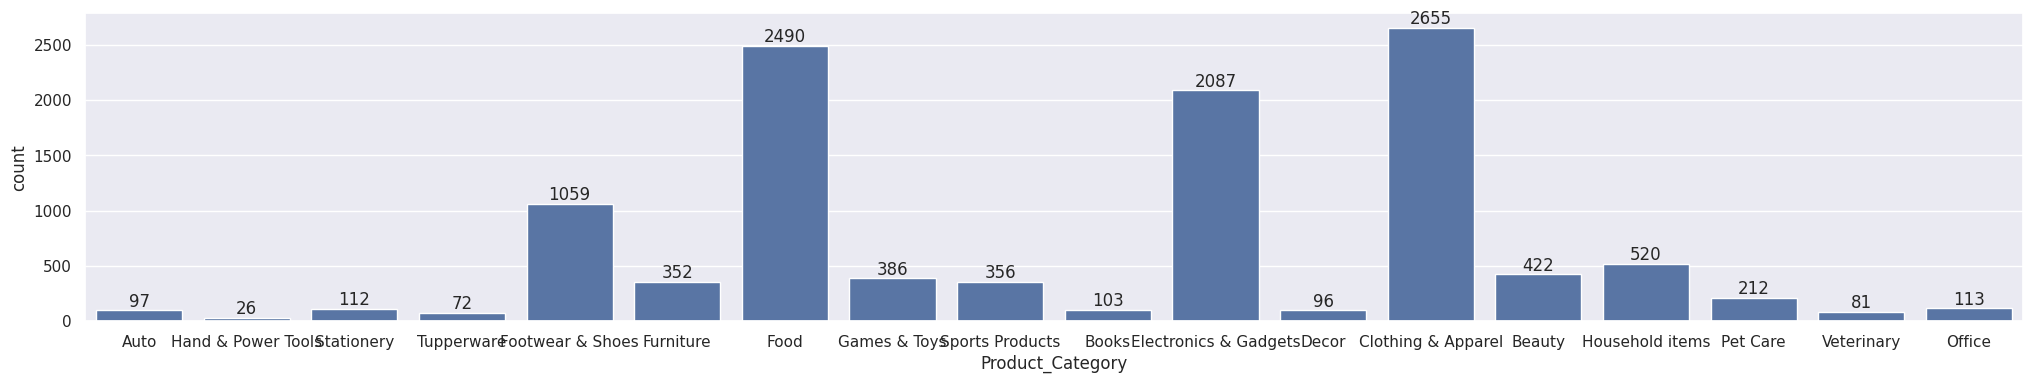

In [36]:
sns.set({'figure.figsize':(25,4)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

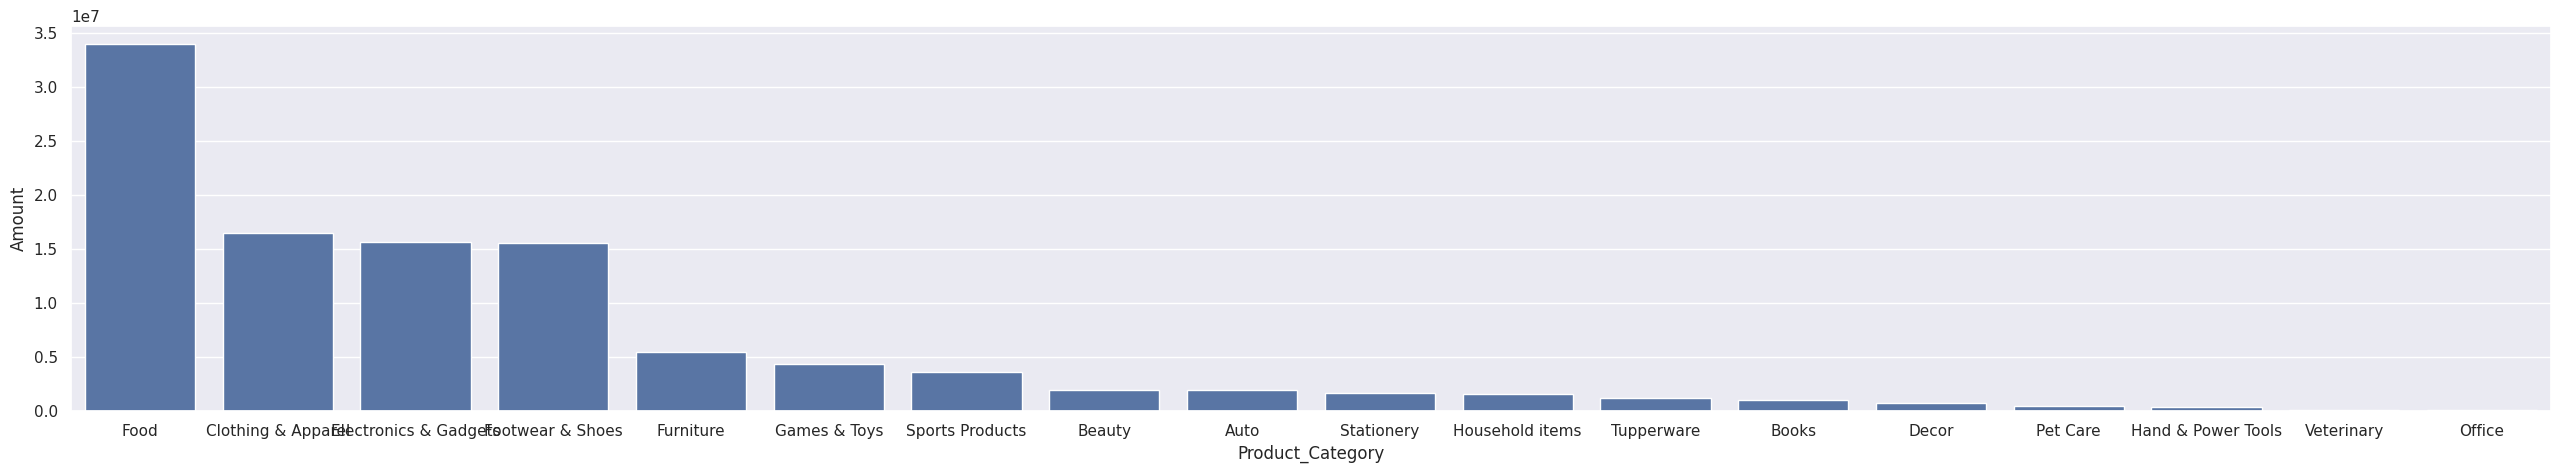

In [37]:
sns.set({'figure.figsize':(32,5)})

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

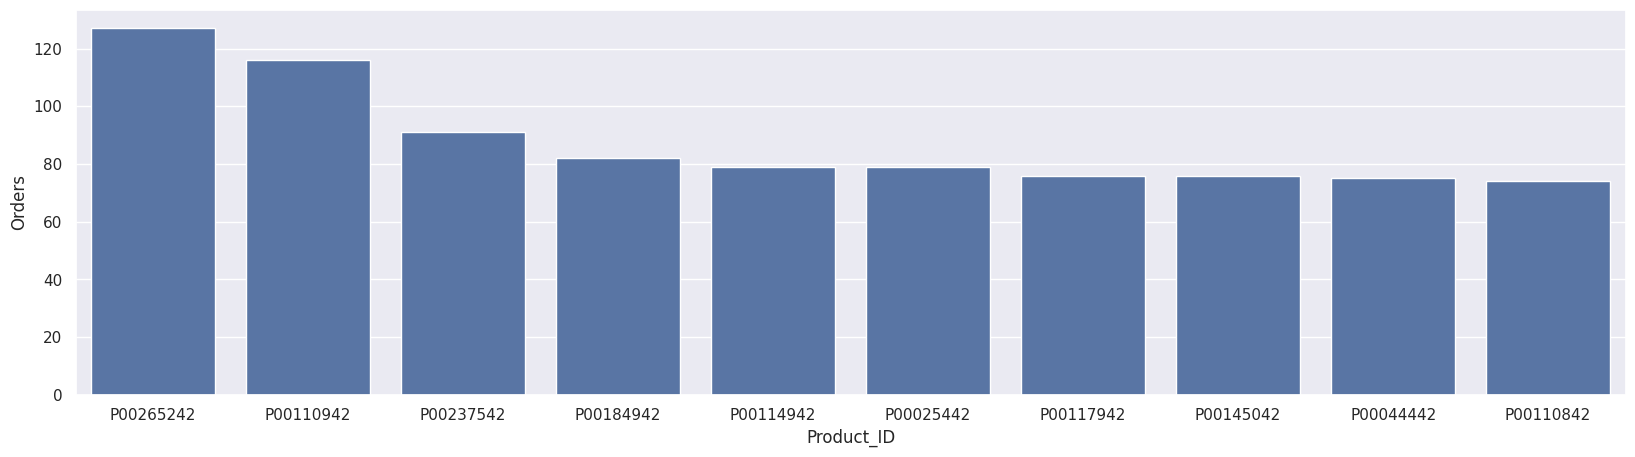

In [38]:
sns.set({'figure.figsize':(20,5)})

toporder = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data = toporder, x = 'Product_ID',y= 'Orders')



<Axes: xlabel='Product_ID'>

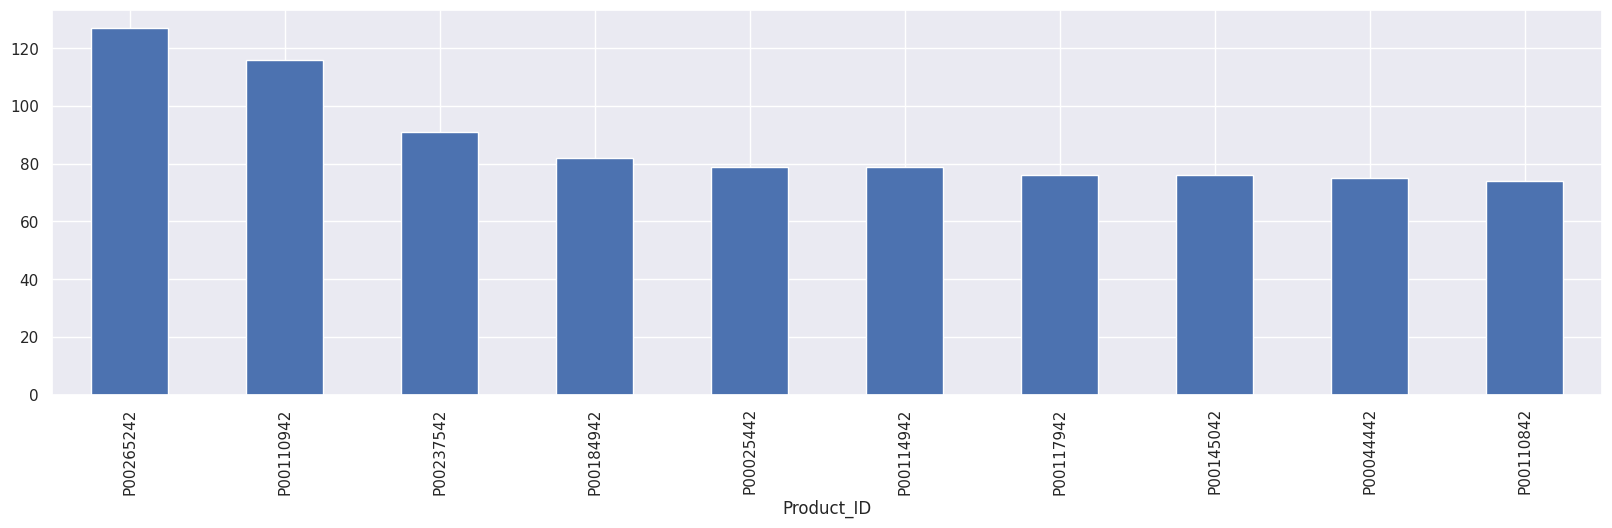

In [39]:
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
